# Wprowadzenie do obliczeń w Pythonie

## Ćwiczenia
Ćwiczenia należy wykonywać w środowisku Python 3. Instrukcję będą miały formę notatników Jupyter Notebook, ale same polecenia można wykonywać w dowolnym IDE (osoby znające Matlaba mogą skorzystać z edytora [Spyder](https://www.spyder-ide.org), który posiada układ podobny do produktu firmy Mathworks).
### Python vs Matlab
W kontekście obliczeń numerycznych oba środowiska są do siebie podobne. W 90% przypadków nazwy funkcji, kolejność argumentów i sposób rozwiązania danego problemu będą takie same w obu środowiskach. Istnieje jednak kilka różnic, o których należy pamiętać:
* Matlab jest narzędziem stworzonym specjalnie do obliczeń, Python to język programowania ogólnego przeznaczenia.
* W Pythonie do wykonywania obliczeń i wizualizacji wykorzystuje się biblioteki takie jak NumPy, SciPy, SymPy, Matplotlib, Seaborn itd. W Matlabie większość funkcjonalności jest dostępna "od ręki" (chociaż istnieją też płatne dodatki).
* W Matlabie tablice/macierze są indeksowane od **1** (tak jak np. w języku Pascal), w Pythonie pierwszy element kolekcji znajduje się na pozycji **0** (tak jak w większości języków programowania ogólnego przeznaczenia, np. C, C++, Java, Kotlin, Swift).
* Sposób mnożenia macierzy (temat zostanie poruszony na jednych z kolejnych zajęć).
Ciekawy zestaw przykładów pokazujący różnice pomiędzy Pythonem i Matlabem (a także Julią) znajdziecie Państwo na [tutaj](https://cheatsheets.quantecon.org).

# Obliczenia numeryczne w Pythonie

Podstawowym pakietem do obliczeń naukowych w Pythonie jest *numpy*. Zwyczajowo importuje się go w następujący sposób:

In [ ]:
import numpy as np

**Uwaga.** Niektóre funkcje (np. *sqrt*) występują w więcej niż jednym pakiecie (np. *sqrt* znajduje się zarówno w *math*, jak i w *numpy*). W takich przypadkach zazwyczaj lepiej jest zastosować implementację z *numpy* (o ile jest dostępna).

In [ ]:
import math

print(math.sqrt(2))
print((np.sqrt(2)))

## Typy proste

***Zadanie 1.***   
Oblicz wartości następujących formuł:
  
$k = 1240\sqrt{7}$  
$m = 2048$  
$l = 2j$  
$d = k+2m$  
$c = d+l$  
  
Po wykonaniu obliczeń sprawdź typy danych utworzonych zmiennych (funkcja *type*)

In [5]:
import math

k = 1240 * math.sqrt(7)
m = 2048
j = 23
l = 2 * j
d = k + 2 * m
c = d + l

In [6]:

print(type(k))
print(type(m))
print(type(j))
print(type(l))
print(type(d))
print(type(c))

<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>


## Formatowanie wyjścia

W pracy z liczbami warto wykorzystać formatowanie stringów.


In [ ]:
'a = {a}, typ: {t}'.format(a = a, t = type(a))

W Pythonie 3.6+ dostępny jest również nowy format zwany *f-String*, który pozwala umieszczać wyrażenia do obliczenia bezpośrednio w łańcuchu.

In [ ]:
f'a = {a}, typ: {type(a)}, 2 + 2 = {2+2}'

Możliwe jest również sterowanie formatowaniem wartości [liczbowych](https://docs.python.org/3/tutorial/inputoutput.html):

In [ ]:
# Dla typu float
print(f'a = {a}')
print(f'a = {a:.3f}')
print(f'a = {a:.50f}')

#Dla typu int
print()
print(f'b = {b}')
print(f'b = {b:10d}')
print(f'b = {b:20d}')

## Typy tablicowe

W bibliotece standardowej Pythona brakuje typu tablicowego (jest jedynie lista), który przydaje się podczas pracy z danymi liczbowymi. Lukę tę wypełnia typ tablicowy z *numpy*. 

In [ ]:
tab = np.array([1,2,3])
tab2 = np.array(([1.0,2],[3,4])) # argument w postaci krotki!
print(f'{tab}, typ: {type(tab)}')
print(f'{tab2}, typ: {type(tab2)}')

Jak widać tablice w *numpy* są obiektami typu *ndarray*. Jest to homogeniczny typ tablicowy, czyli taki, który pozwala przechowywać jedynie dane tego samego typu (w każdej tablicy wszystkie elementy są jednego typu, tak jak np. w C). Dane heterogeniczne można przechowywać np. w strukturze *DataFrame* z biblioteki *Pandas*.
Obiekt typu *ndarray* posiada kilka interesujących atrybutów:
* *shape* — kształt tablicy, czyli krotka zawierająca liczbę elementów dla każdego wymiaru (osi) tablicy. Wymiary można również sprawdzić za pomocą *np.shape()*.
* *size* — sumaryczna liczba elementów.
* *ndim* — liczba wymiarów (osi).
* *nbytes* — liczba bajtów zajmowana przez obiekt.
* *dtype* — typ danych przechowywanych w tablicy. Można go jawnie określić podczas tworzenia tablicy (parametr dtype)
 

In [ ]:
def printDetails(arr):
    print(f'Tablica {arr}')
    print(f'   shape = {arr.shape}')
    print(f'   size = {arr.size}')
    print(f'   ndim = {arr.ndim}')
    print(f'   nbytes = {arr.nbytes}')
    print(f'   dtype = {arr.dtype}')
    print()

***Uwaga!*** W *numpy* dostępny jest też typ *matrix*. Jest on obecnie uznany za ,,przestarzały'' (ang. *deprecated*) i nie należy z niego korzystać (nawet w zastosowaniach numerycznych, co sugerowałaby jego nazwa).

In [ ]:
printDetails(tab) # Uwaga na shape!
printDetails(tab2)



#### Zmiana kształtu
Do zmiany kształtu tablic służy funkcja *reshape()*. Nowe wymiary muszą odpowiadać liczbie elementów w tablicy!

In [ ]:
tab3 = tab.reshape(1,3)
printDetails(tab3)

tab4 = tab.reshape(10,3)



#### Tworzenie tablic

Poza metodą *array*, tablice można utworzyć również z pomocą wielu innych [funkcji](https://numpy.org/doc/stable/reference/routines.array-creation.html#routines-array-creation) m.in.:
* *np.zeros()* — tworzy tablicę o zadanym rozmiarze wypełnioną zerami.
* *np.ones()* — tworzy tablicę o zadanym rozmiarze wypełnioną jedynkami.
* *np.identity()* — tworzy macierz identycznościową o zadanym rozmiarze.
* *np.eye()* — tworzy tablicę o zadanym rozmiarze z jedynkami na przekątnej.
* **np.linspace()** — tworzy tablicę z równomiernie rozmieszczonymi wartościami znajdującymi się pomiędzy określoną początkową i końcową wartością z użyciem określonej liczby elementów.
* *np.fromfile(), np.fromstring(), np.loadtxt()* — tworzy tablice na podstawie danych z plików lub stringów.

In [ ]:
zeros = np.zeros((2,2))
print(zeros)

In [ ]:
ones = np.ones([5,10])
print(ones)

In [ ]:
np.identity(10)

In [ ]:
np.eye(10)

In [ ]:
np.linspace(1,10,5) # Tablica 5 wartości rozmieszczonych równomiernie w przedziale [1,10]

## Operacje na macierzach

### Indeksowanie

In [ ]:
A = np.array(([1,2,3],[4,5,6],[7,8,9]))
print(A)

In [ ]:
A[1,1]

In [ ]:
A[0,0]

In [ ]:
A[0:2,0:1]

In [ ]:
A[-1,-1]

In [ ]:
A[A>5]

In [ ]:
A[A%2==0]

In [ ]:
B = A
B[B>5] = 37 # Indeksowanie wraz z przypisaniem nowej wartości
B

### Operacje arytmetyczne

In [ ]:
A = np.array(([1,2,3],[4,5,6],[7,8,9],[10,11,12]))
B = np.array(([-1,-2,-3],[-4,-5,-6],[-7,-8,-9],[-10,-11,-12]))
C = np.array(([20,21,22,23],[24,25,26,27],[28,29,30,31]))

In [ ]:
print(A)
print(B)
print(C)

In [ ]:
A+B

In [ ]:
A-B

In [ ]:
B-A

In [ ]:
A*B # Mnożenie odpowiadających sobie elementów!!

In [ ]:
A/B # Dzielenie odpowiadających sobie elementów!!

In [ ]:
A*C # Niepoprawne, wymiary nie są zgodne

In [ ]:
np.dot(A,C) # Mnożenie macierzowe macierzy

In [ ]:
A @ C # Inny zapis, Python 3.5+

In [ ]:
A.T # Macierz transponowana

In [ ]:
np.transpose(A)

***Zadanie 2.***  
Zadeklaruj macierz 
$\mathbf{M} =\left[ \begin{matrix}
\sqrt{2} & 1 & -\sqrt{2}\\
0 & 1 & 1\\
-\sqrt{2} & \sqrt{2} & 1
\end{matrix}\right]
$    
Wyznacz numerycznie jej macierz odwrotną (*np.linalg.inv*) i transponowaną. Oblicz wyznacznik tej macierzy (*np.linalg.det()*). Wypisz otrzymane wyniki. 

In [7]:
import numpy as np


M = np.array([[np.sqrt(2), 1, -np.sqrt(2)],
              [0, 1, 1],
              [-np.sqrt(2), np.sqrt(2), 1]])


M_inv = np.linalg.inv(M)


M_T = np.transpose(M)


det_M = np.linalg.det(M)


print("Macierz odwrotna:")
print(M_inv)
print("\nMacierz transponowana:")
print(M_T)
print("\nWyznacznik macierzy:")
print(det_M)

Macierz odwrotna:
[[ 0.10355339  0.75       -0.60355339]
 [ 0.35355339  0.14644661  0.35355339]
 [-0.35355339  0.85355339 -0.35355339]]

Macierz transponowana:
[[ 1.41421356  0.         -1.41421356]
 [ 1.          1.          1.41421356]
 [-1.41421356  1.          1.        ]]

Wyznacznik macierzy:
-4.0


# Wizualizacja danych

Do wizualizacji wyników, tworzenia wykresów itd. wykorzystamy bibliotekę *matplotlib*, a konkretniej jej stanowe i obiektowe API zwane *pyplot*. Zwyczajowo importu dokonuje się w następujący sposób:

In [ ]:
import matplotlib.pyplot as plt

Tworzenie wykresu rozpoczyna się od utworzenia "okna":

In [ ]:
fig = plt.figure()

Następnie można skorzystać z jednej z dostępnych metod wizualizacji. Do stworzenia wykresu potrzebne będą też dane. Funkcja *plt.plot()* pozwala wyświetlić dane przekazane w postaci tablic (np. tablic punktów X i Y).

In [ ]:
X = np.linspace(0,2*np.pi, 1000)
Y = np.sin(X)

In [ ]:
plt.plot(X,Y)

Wykresy można również personalizować.

In [ ]:
plt.plot(X,Y)
plt.title('Wykres $sin(x)$')
plt.xlim([0,2*np.pi])
plt.xlabel('x')
plt.ylabel('sin(x)')


Na jednym wykresie można pokazać kilka ,,obiektów''. Możliwe jest również dodanie siatki i legendy (treści ,,matematyczne'' wstawiamy między dolarami).

In [ ]:
plt.figure(figsize=(14,10)) # Stworzenie ,,większego'' okna
X = np.linspace(-10,10, 1000)

plt.plot(X,X**2, label = '$x^2$') # W argumencie label umieszcza się nazwy krzywych do legendy
plt.plot(X,X**3, label = '$x^3$')
plt.plot(X,np.tan(X), label = '$tg(x)$')
plt.xlim([-10,10])
plt.ylim([-100,100])
plt.xlabel('x')
plt.grid() # Wyświetlanie siatki
plt.legend() # Dodanie legendy
plt.axhline(y=0, color='k') # Dodanie osi x = 0
plt.axvline(x=0, color='k') # Dodanie osi y = 0

Dane na wykresie niekoniecznie muszą mieć formę krzywych

In [ ]:
plt.figure()
X = np.linspace(0,2*np.pi, 50)
plt.plot(X,np.sin(X), '*')
plt.title('Wykres $sin(x)$')
plt.xlim([0,2*np.pi])
plt.xlabel('x')
plt.ylabel('sin(x)')


In [ ]:
plt.figure()
X = np.linspace(0,2*np.pi, 50)
plt.plot(X,np.sin(X), 'r+')
plt.title('Wykres $sin(x)$')
plt.xlim([0,2*np.pi])
plt.xlabel('x')
plt.ylabel('sin(x)')

***Zadanie 3.***

Zdefinuj funkcję 
$f(x) = x^3 - 5x + 7$
i stwórz jej wykresy w przedziałach:
* $x\in<-1,1>$ 
* $x\in<-10,20>$

Spersonalizuj wykresy: dodaj tytuły, opisy osi etc.

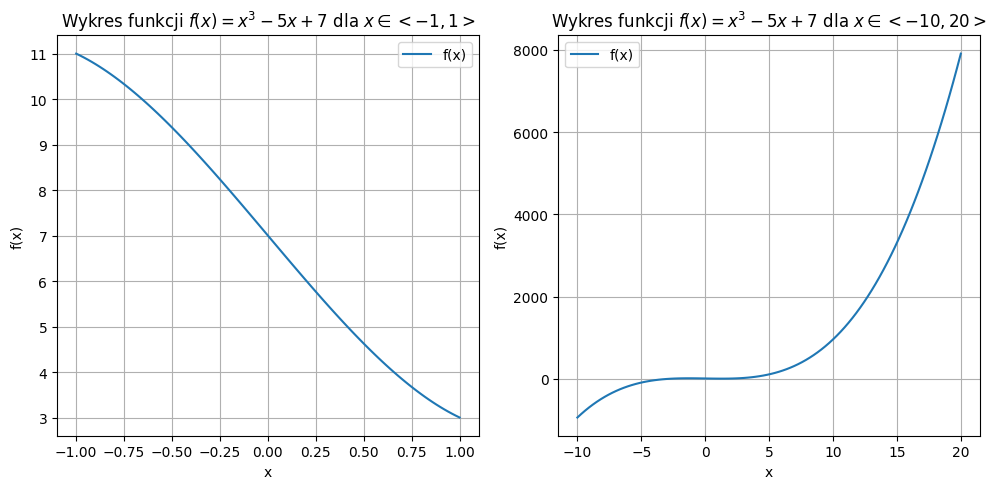

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 5*x + 7


x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-10, 20, 100)


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.plot(x1, f(x1), label='f(x)')
plt.title('Wykres funkcji $f(x) = x^3 - 5x + 7$ dla $x \in <-1, 1>$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x2, f(x2), label='f(x)')
plt.title('Wykres funkcji $f(x) = x^3 - 5x + 7$ dla $x \in <-10, 20>$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()

# Wizualizacja macierzy

W obliczeniach numerycznych często pojawia się potrzeba porównania zawartości dwóch macierzy lub wektorów. Jednym z prostych rozwiązań jest przedstawienie obu macierzy w postaci „graficznej”, w której kolory reprezentują wartości znajdujące się w macierzy.

In [ ]:
A = np.identity(5)
B = np.diag([1,1,1,1,1])

plt.subplot(1,2,1)
plt.imshow(A)
plt.title('Macierz A')

plt.subplot(1,2,2)
plt.imshow(B)
plt.title('Macierz B')

Uwaga: kolorystykę można dostoswać za pomocą argumentu `cmap` (np. `cmap='gray'`)

***Zadanie 4.***

Zastanów się nad innymi sposobami porównywania macierzy. Jak można to zrobić, jak łatwo ocenić czy dwie macierze zawierają te same/podobne wartości?

In [13]:
import numpy as np

A = np.identity(5)
B = np.diag([1, 1, 1, 1, 1])

norm_A = np.linalg.norm(A)
norm_B = np.linalg.norm(B)

print("Norma macierzy A:", norm_A)
print("Norma macierzy B:", norm_B)

#Norma macierzy  jest miarą "długości" macierzy i może służyć jako prosty sposób porównania macierzy. Jeśli normy dwóch macierzy są bliskie, można założyć, że macierze są podobne.


Norma macierzy A: 2.23606797749979
Norma macierzy B: 2.23606797749979


***Zadanie 5.***

Stwórz kwadratową macierz wartości losowych o wymarach 10x10. Następnie przeprowadź jej rozklad QR za pomocą funkcji [`scipy.linalg.qr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.qr.html) (sprawdź, w dokumentacji jak działa ta funkcja oraz jakie wartości zwraca). W wyniku rozkładu otrzymasz dwie macierze `Q` i `R` (szczegóły na jednych z kolejnych zajęć). Następnie przypisz macierz Q do zmiennej i wyznacz jej **transpozycję** ($Q^T$) oraz **odwrotność** ($Q^{-1}$). Porównaj ze sobą te dwie macierz. Jaki wynik otrzymałeś i dlaczego? Powtórz obliczenia kilkukrotnie dla macierzy o różnych rozmiarach.

In [15]:
import numpy as np
from scipy.linalg import qr


A = np.random.rand(10, 10)


Q, R = qr(A)


Q_T = np.transpose(Q)


Q_inv = np.transpose(Q)


print("Macierz Q:")
print(Q)
print("\nTranspozycja macierzy Q (Q^T):")
print(Q_T)
print("\nOdwrotność macierzy Q (Q^-1):")
print(Q_inv)

Macierz Q:
[[-2.38816740e-01  9.48323061e-02  3.34698699e-01  3.47494647e-01
  -1.85751412e-02 -4.03966859e-04  3.29477294e-01  2.46142207e-01
   6.40134059e-01 -3.49198458e-01]
 [-6.11093966e-01 -3.21228872e-01 -1.18931481e-01  3.12901400e-01
  -1.58951507e-01 -4.92196053e-01 -2.66054389e-01 -2.22214893e-01
   1.29630106e-02  1.53196672e-01]
 [-2.22666581e-01  7.50313775e-02 -1.64665502e-01  5.01756735e-02
  -4.73715429e-01  5.17765883e-01 -3.38411549e-01 -1.12601215e-01
  -1.20422946e-01 -5.30062871e-01]
 [-3.69008563e-02  6.02057693e-01 -2.24795853e-01 -3.96510155e-01
  -5.71631521e-02 -3.10017274e-01 -3.79184106e-01  1.52904635e-02
   4.29547274e-01  2.25344403e-02]
 [-1.51950152e-01 -1.04478077e-02  3.50810425e-02 -4.18423429e-01
  -1.92827817e-01 -1.86357004e-02  5.40332978e-01 -6.76711607e-01
   9.86907065e-02 -5.76637668e-02]
 [-6.59255780e-02  6.06216110e-01 -1.37984291e-01  3.99957726e-01
  -3.40351328e-01 -8.03240226e-02  3.69093154e-01  7.24441488e-02
  -3.51432878e-01  2.4